# Unsupervised Learning: Trade&Ahead



### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Reading the **Dataset**

In [ ]:
# loading the dataset
import pandas as pd

# Read the CSV file using the correct path
data = pd.read_csv("/content/sample_data/stock_data.csv")


In [ ]:
# Read the CSV file using the correct path
data = pd.read_csv("/content/sample_data/stock_data.csv")

## Data Overview

- Observations
- Sanity checks

# Checking the shape of the dataset

In [ ]:
data.shape

(340, 15)

## The dataset has 340 rows and 15 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

# Displaying few rows of the dataset

In [ ]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [ ]:
data.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912


In [ ]:
data.tail(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
330,XL,XL Capital,Financials,Property & Casualty Insurance,39.180000,7.696534,0.991011,10,99,734422000,1201560000,4.22,2.847299e+08,9.284360,-7.762677
331,XOM,Exxon Mobil Corp.,Energy,Integrated Oil & Gas,77.949997,3.656915,1.370062,9,7,-911000000,16150000000,3.85,4.194805e+09,20.246752,-2.706443
332,XRAY,Dentsply Sirona,Health Care,Health Care Supplies,60.849998,19.901474,1.007230,11,60,133000000,251200000,1.79,1.403352e+08,33.994412,0.855096
333,XRX,Xerox Corp.,Information Technology,IT Consulting & Other Services,10.630000,9.474768,1.866680,5,26,-43000000,474000000,0.42,1.128571e+09,25.309524,-0.295949
334,XYL,Xylem Inc.,Industrials,Industrial Conglomerates,36.500000,11.009729,1.166311,16,83,17000000,340000000,1.88,1.808511e+08,19.414894,4.130471
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,4.985294e+08,70.470585,1.723068


# **Creating a copy of original data**





In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

# Checking the data types of the columns for the dataset

In [ ]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

# Observations:

*The dataset contains information about various stock companies.


*It includes details such as the ticker symbol, security name, GICS sector, GICS sub-industry, financial metrics, and ratios.

---



## Let's take a look at the summary of the data

In [ ]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


# Observations

In [ ]:
# Let us clean columns names
cols_init = df.columns.tolist()
cols_new = [item.split("(")[0].rstrip() for item in cols_init]
cols_units = ["(" + item.split("(")[-1] if "(" in item else None for item in cols_init]
print("New column names:\n", cols_new)
print("\nDescription/Units:\n", cols_units)


New column names:
 ['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry', 'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

Description/Units:
 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [ ]:
# Original column names
cols_init = df.columns.tolist()

# Extract new column names by removing text inside parentheses
cols_new = [item.split("(")[0].rstrip() for item in cols_init]

# Extract units by keeping text inside parentheses (if present)
cols_units = ["(" + item.split("(")[-1] if "(" in item else None for item in cols_init]

# Print the new column names and their corresponding units
print("New column names:\n", cols_new)
print("\nDescription/Units:\n", cols_units)

New column names:
 ['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry', 'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

Description/Units:
 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [ ]:
df.columns = cols_new
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Ticker Symbol' are 

 ['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APH' 'ARNC'
 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAC' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB'
 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CCL'
 'CELG' 'CF' 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME'
 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS'
 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EMN' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN'
 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'F' 'FAST' 'FB' 'FBHS' 'FCX' 'FE'
 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'FTR' 'GD' 'GGP'
 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN'
 'HCP' 'HE

In [ ]:
# defining the small positive value
epsilon = 0.00001

# replacing the incorrect values
for item in cols:
    df[item] = df[item].apply(lambda x: np.nan if x in [-99, "-99"] else x)
    df[item] = df[item].apply(lambda x: np.nan if x == "..." else x)
    df[item] = df[item].apply(lambda x: epsilon if x == "~0" else x)
    df[item] = df[item].apply(lambda x: epsilon if x == "~0.0" else x)

In [ ]:
data.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912


In [ ]:
df.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912


This snippet displays the first 10 rows of your DataFrame with the columns and their corresponding values.

In [ ]:
type_cols = [
    "Current Price",
    "Price Change",
    "Volatility",
    "ROE",
    "Cash Ratio",
    "Net Cash Flow",
    "Net Income",
    "Earnings Per Share",
    "Estimated Shares Outstanding",
    "P/E Ratio",
    "P/B Ratio",
]

for item in type_cols:
    df[item] = pd.to_numeric(df[item])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Now we can convert the columns which are actually numeric in nature from object to int/float type.**

In [ ]:
# List of columns to be used for clustering
cluster_cols = [
    "GICS Sector",
    "Current Price",
    "Price Change",
    "Volatility",
    "ROE",
    "Cash Ratio",
    "Net Cash Flow",
    "Net Income",
    "Earnings Per Share",
    "P/E Ratio",
    "P/B Ratio"]

for item in type_cols:
    df[item] = pd.to_numeric(df[item])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
df1 = df[cluster_cols].copy()
df1.head()

,GICS Sector,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,P/E Ratio,P/B Ratio
0,Industrials,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,3.718174,-8.784219
1,Health Care,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,18.806350,-8.750068
2,Health Care,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,15.275510,-0.394171
3,Information Technology,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,74.555557,4.199651
4,Information Technology,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,178.451613,1.059810


In [ ]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0
Net Income,340.0,NaN,NaN,NaN,1494384602.941176,3940150279.327936,-23528000000.0,352301250.0,707336000.0,1899000000.0,24442000000.0
Earnings Per Share,340.0,NaN,NaN,NaN,2.776662,6.587779,-61.2,1.5575,2.895,4.62,50.09
P/E Ratio,340.0,NaN,NaN,NaN,32.612563,44.348731,2.935451,15.044653,20.819876,31.764755,528.039074


GICS Sector: The dataset contains companies from 11 different sectors, with "Industrials" being the most common sector.

Current Price: The current stock prices vary widely, with a mean of approximately 80.86 and a standard deviation of 98.05. The minimum price is 4.5, and the maximum price is 1274.95.

Price Change: The price change also shows a wide variation, with a mean of approximately 4.08 and a standard deviation of 12.01. The largest positive change is 55.05, while the largest negative change is -47.13.

Volatility: The volatility of the stocks varies, with a mean of approximately 1.53 and a standard deviation of 0.59. The volatility values range from 0.73 to 4.58.

ROE (Return on Equity): The ROE values have a mean of approximately 39.60, indicating a variation in the profitability of different companies.

Cash Ratio: The cash ratio shows a mean of around 70.02, indicating the liquidity of companies in terms of their cash reserves. The ratio ranges from 0 to 958.

Net Cash Flow: The net cash flow varies widely, with a mean of approximately 55,537,620.59 and a standard deviation of 1,946,365,312.18.

Net Income: The net income also varies significantly, with a mean of approximately 1,494,384,602.94. The net income values range from -23,528,000,000 to 24,442,000,000.

Earnings Per Share: The earnings per share (EPS) show a mean of around 2.78, with values ranging from -61.2 to 50.09.

P/E Ratio: The price-to-earnings (P/E) ratio has a mean of approximately 32.61 and a standard deviation of 44.35. The P/E ratio values vary widely from 2.94 to 528.04.

P/B Ratio: The price-to-book (P/B) ratio ranges from -76.12 to 129.06, with a mean of approximately -1.72.

**Data Preprocessing**

In [ ]:
# checking for missing values

df1.isnull().sum()

GICS Sector           0
Current Price         0
Price Change          0
Volatility            0
ROE                   0
Cash Ratio            0
Net Cash Flow         0
Net Income            0
Earnings Per Share    0
P/E Ratio             0
P/B Ratio             0
dtype: int64

It looks like there are no missing values in the columns This is a positive sign for data quality, as missing values can sometimes pose challenges in clustering and other analysis tasks. Now we can proceed with scaling and clustering the dataset using these numerical variables.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

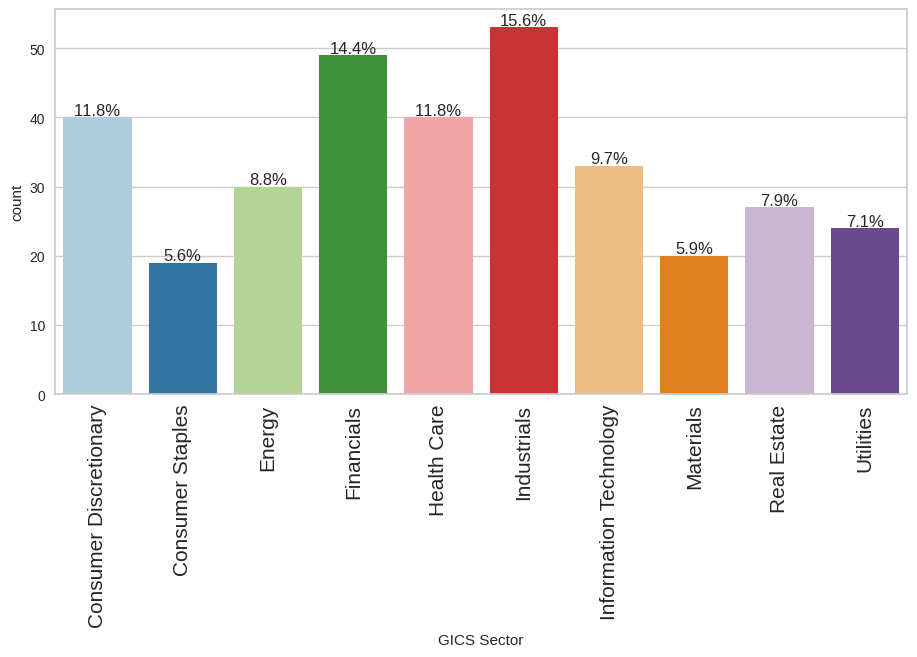

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the DataFrame and "GICS Sector" is the feature to plot
labeled_barplot(df, "GICS Sector", perc=True, n=10)

**Observations**


According to the bar graph of the GICS sector, it can be seen that the industrials had the highest percentage with 15.6% while the financials are at second place with 14.4%. On the other end of the spectrum, it is seen that the Consumer Staples have the lowest percentage at 5.6%.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

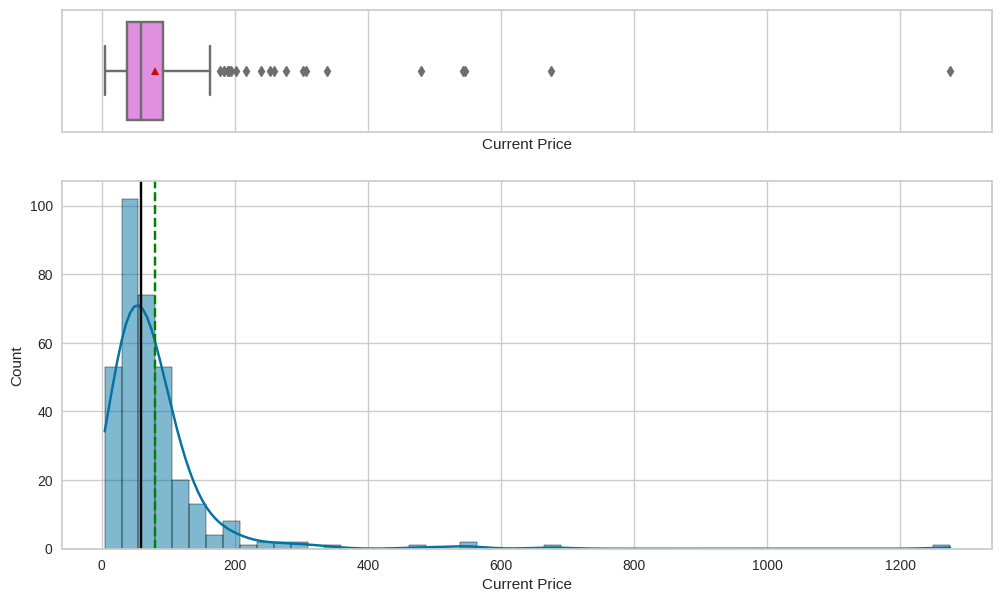

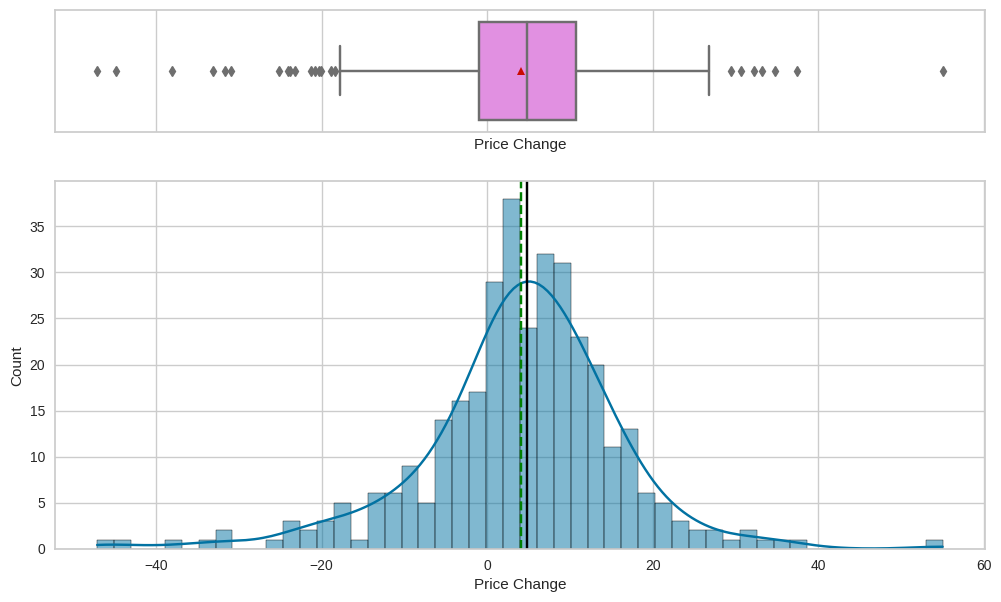

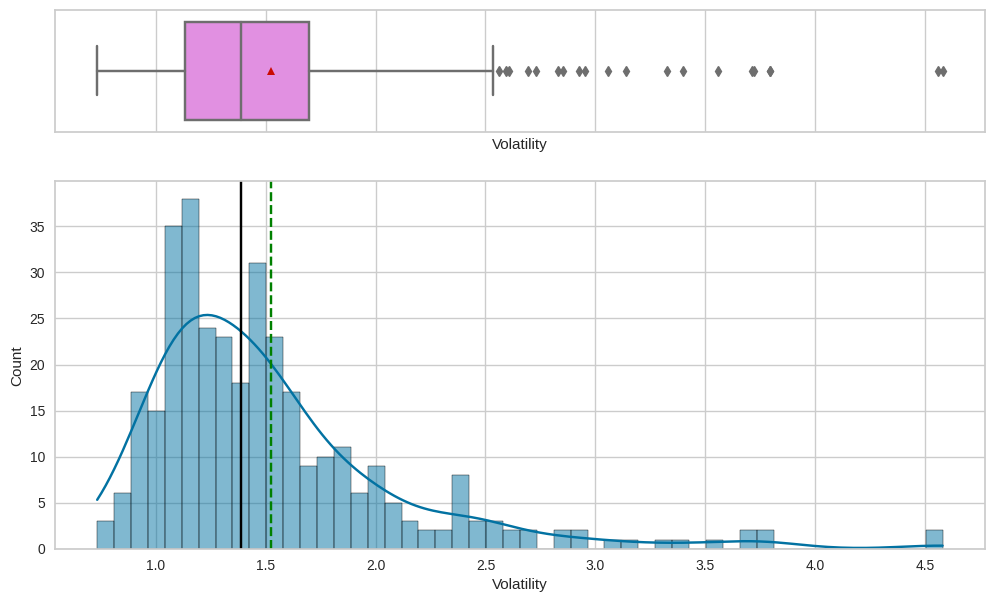

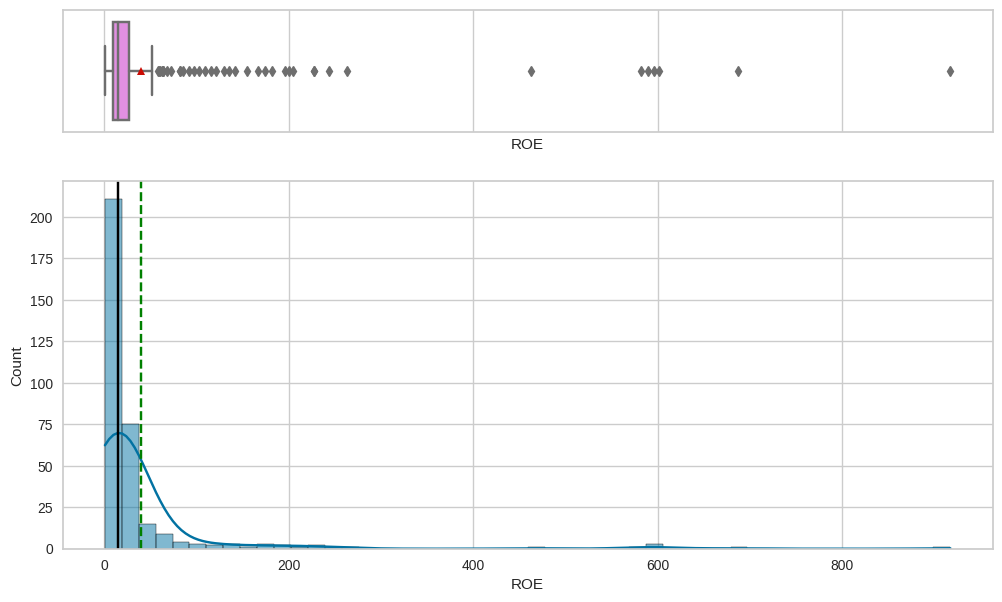

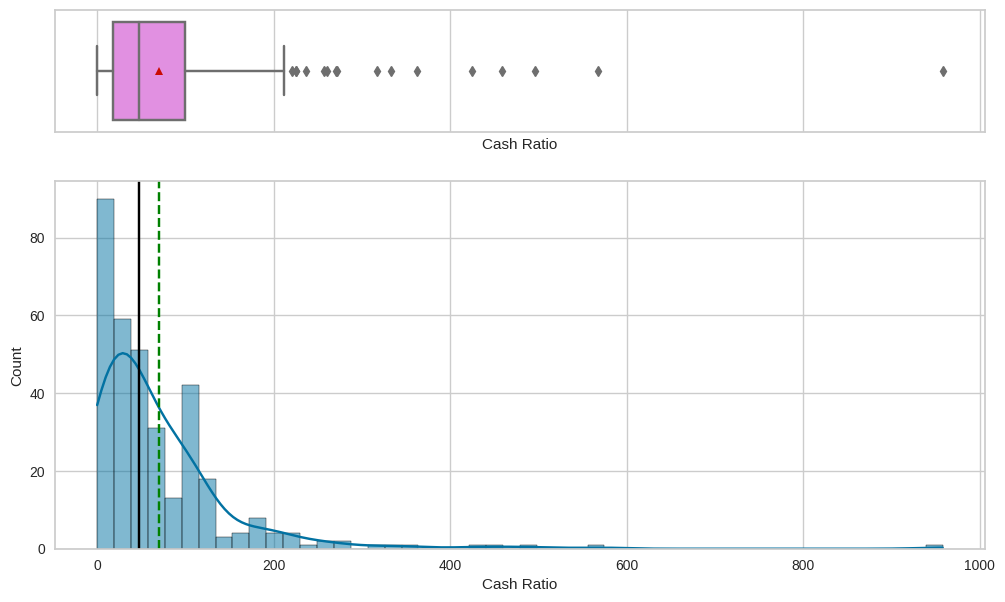

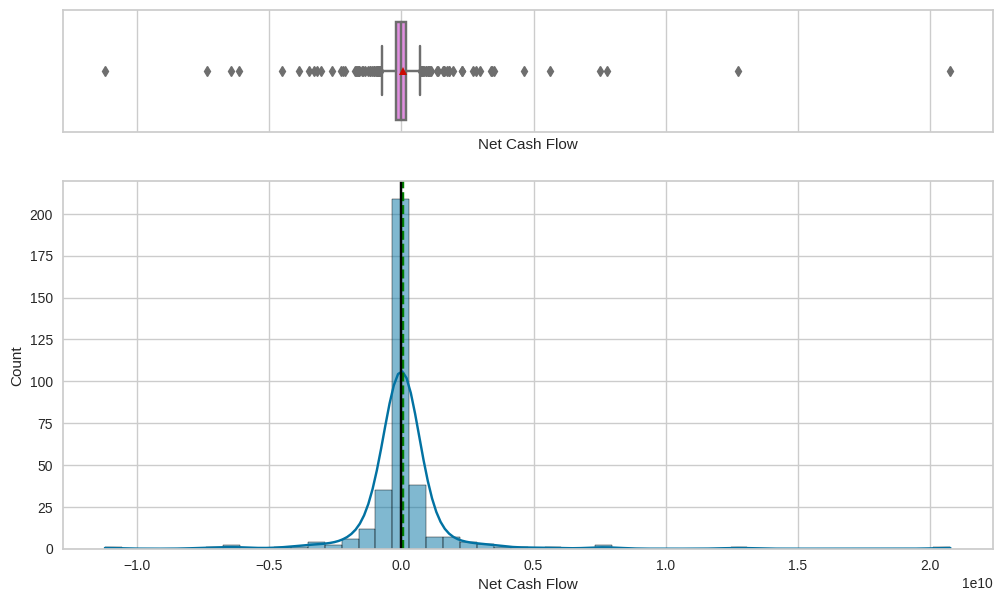

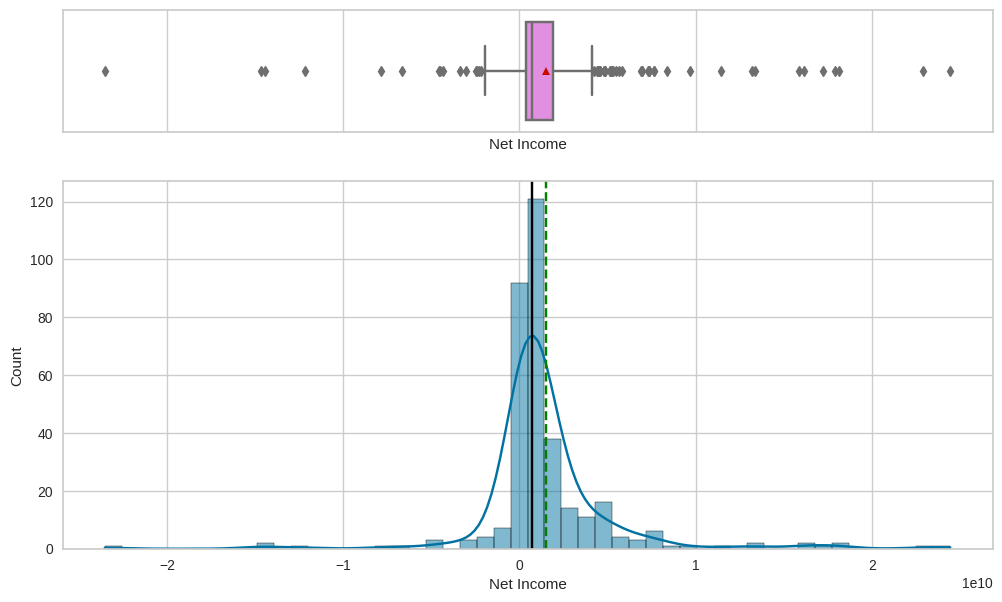

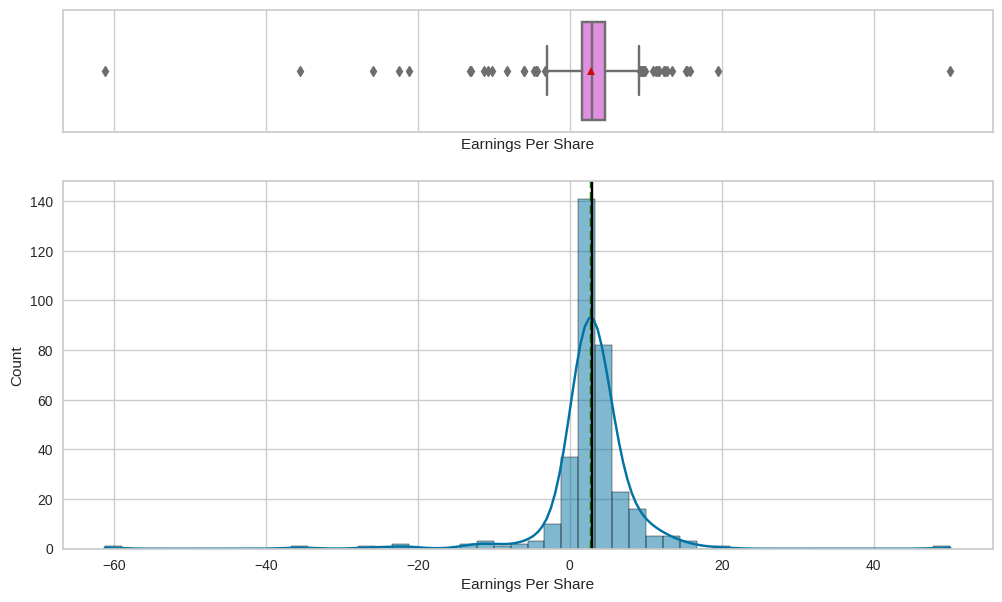

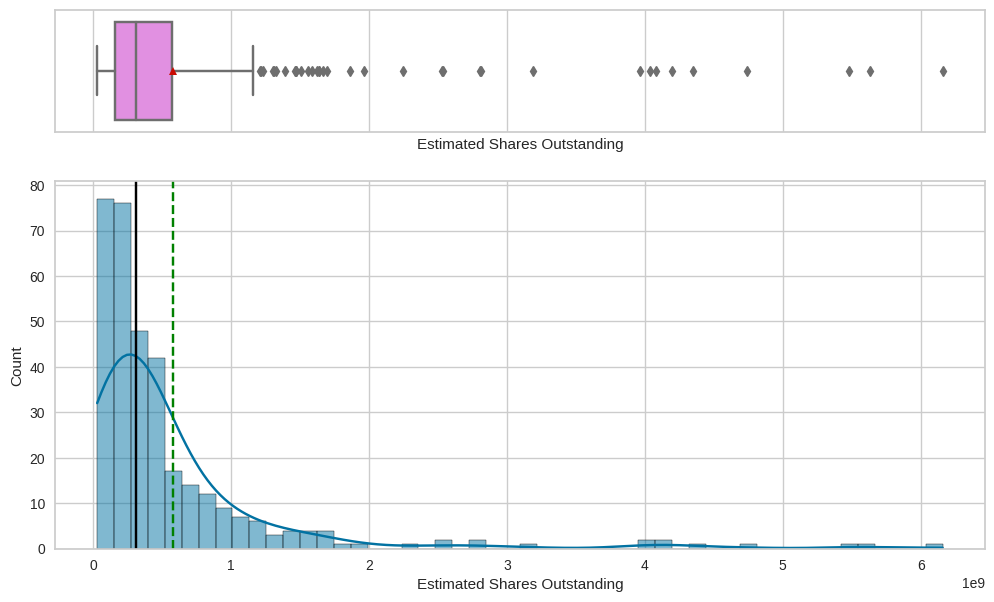

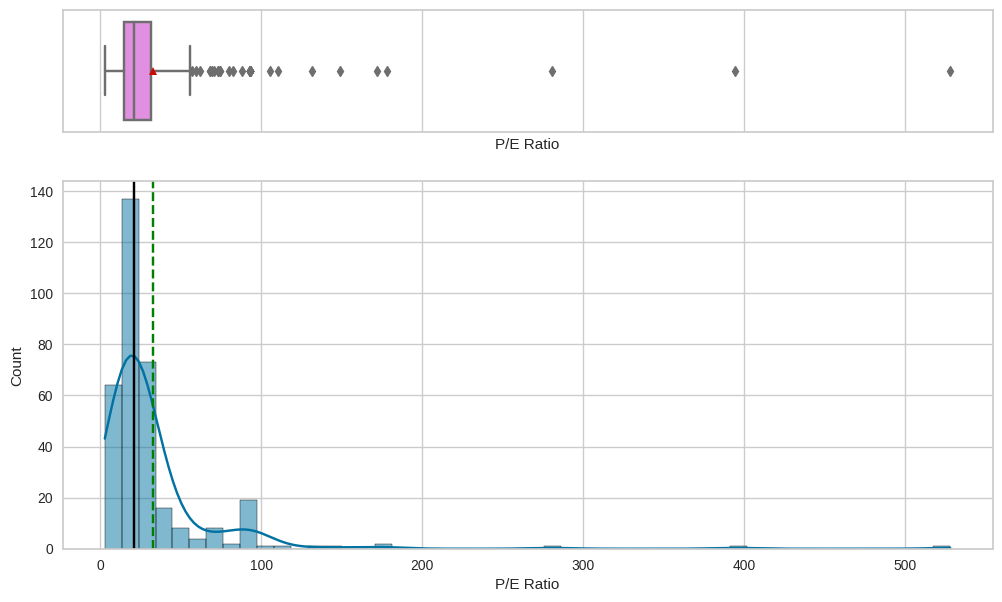

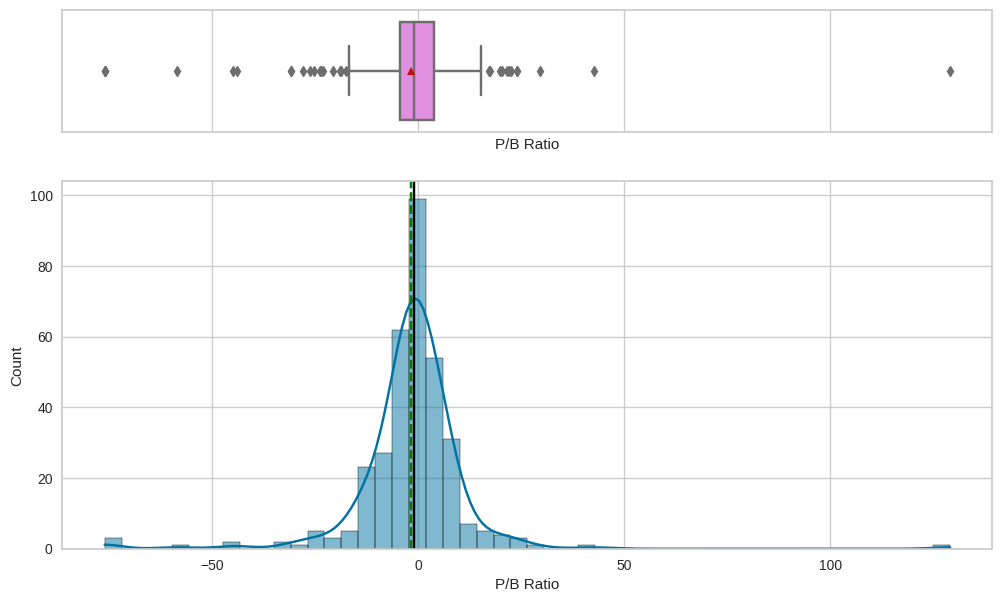

In [ ]:
# Selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Loop through numerical columns and create combined plots
for item in num_cols:
    histogram_boxplot(df, item, figsize=(12, 7), kde=True, bins=50)

# Observations




**Current Price:**

*The distribution is right-skewed, with a longer tail towards higher prices.

*There are a few extreme outliers on the higher end of the price scale.


**Price Change:**

*The distribution is relatively symmetric and centered around zero.

*The range of price changes is quite wide, with some extreme positive and negative values.


**Volatility:**

*The distribution is close to normal and relatively symmetric.

*Volatility values are concentrated around the lower end, with a few higher values.


**ROE (Return on Equity):**

*The distribution is right-skewed, indicating that there are some companies with high ROE values.

*There are a few extreme outliers with very high ROE values.


**Cash Ratio:**

*The distribution is right-skewed, with most companies having relatively low cash ratios.

*There are some companies with higher cash ratios.


**Net Cash Flow:**

*The distribution is right-skewed, with most companies having positive net cash flow values.

*There are a few companies with very high positive net cash flow values.


**Net Income:**

*The distribution is right-skewed, with most companies having positive net income values.

*There are some companies with very high positive net income values.


**Earnings Per Share:**

*The distribution is slightly right-skewed, indicating that there are some companies with high EPS values.

*There are some negative EPS values, which might need further investigation.


**Estimated Shares Outstanding:**

*The distribution is right-skewed, with most companies having lower estimated shares outstanding.

*There are some companies with higher estimated shares outstanding.


**P/E Ratio:**

*The distribution is right-skewed, indicating that there are some companies with high P/E ratios.

*There are some extreme outliers with very high P/E ratios.


**P/B Ratio:**

*The distribution is left-skewed, with most companies having P/B ratios around zero or slightly positive.



*There are some outliers with negative P/B ratios.

# Bivariate Analysis

**Let's check for correlations.**

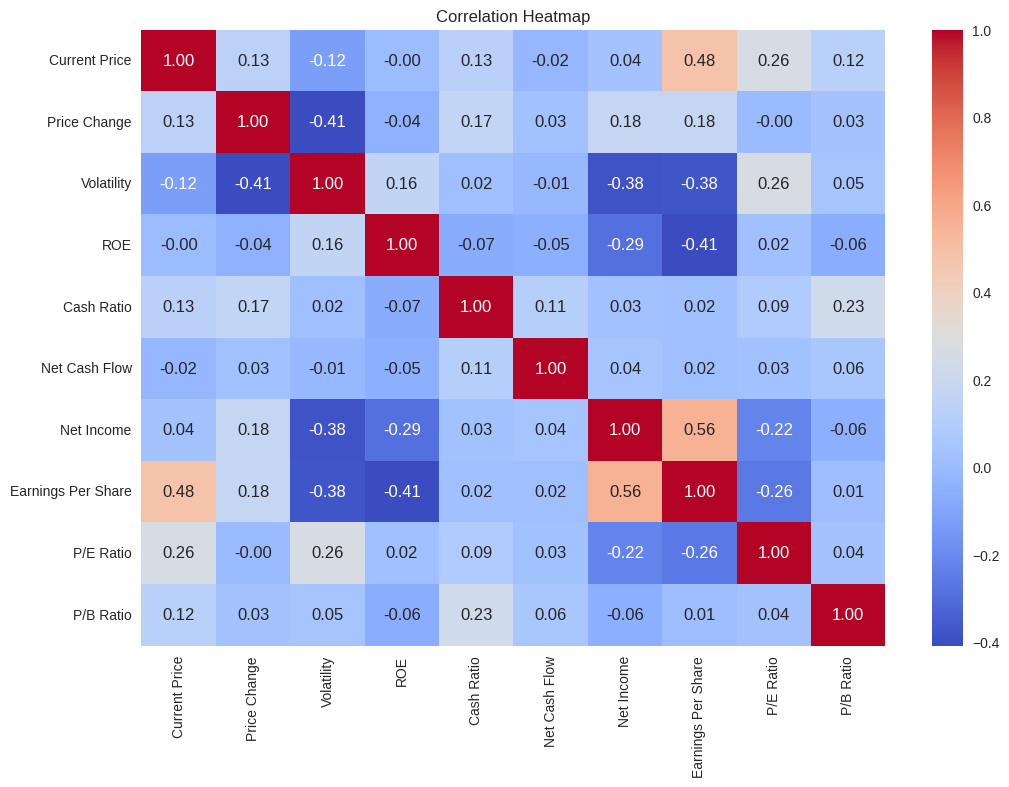

In [ ]:
# Calculate the correlation matrix
corr_matrix = df1.corr()

# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Price Change and Current Price: There is a positive correlation between "Price Change" and "Current Price," which suggests that higher current stock prices tend to have higher price changes.

Earnings Per Share and Net Income: There is a positive correlation between "Earnings Per Share" and "Net Income," indicating that companies with higher net income tend to have higher earnings per share.

Earnings Per Share and Price Change: There is a positive correlation between "Earnings Per Share" and "Price Change," suggesting that companies with higher earnings per share might experience larger price changes.

P/E Ratio and Price Change: There is a positive correlation between the "P/E Ratio" and "Price Change," implying that companies with higher price-to-earnings ratios might experience larger price changes.

P/E Ratio and Earnings Per Share: There is a negative correlation between the "P/E Ratio" and "Earnings Per Share," which could indicate that higher P/E ratios are associated with lower earnings per share.

P/E Ratio and Net Income: There is a negative correlation between the "P/E Ratio" and "Net Income," suggesting that companies with higher P/E ratios might have lower net income.

P/B Ratio and ROE: There is a negative correlation between the "P/B Ratio" and "ROE" (Return on Equity), implying that companies with higher ROE might have lower price-to-book ratios.

P/B Ratio and Earnings Per Share: There is a negative correlation between the "P/B Ratio" and "Earnings Per Share," indicating that companies with higher price-to-book ratios might have lower earnings per share.

**Let's scale the data before we proceed to cluster it.**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GICS Sector         340 non-null    object 
 1   Current Price       340 non-null    float64
 2   Price Change        340 non-null    float64
 3   Volatility          340 non-null    float64
 4   ROE                 340 non-null    int64  
 5   Cash Ratio          340 non-null    int64  
 6   Net Cash Flow       340 non-null    int64  
 7   Net Income          340 non-null    int64  
 8   Earnings Per Share  340 non-null    float64
 9   P/E Ratio           340 non-null    float64
 10  P/B Ratio           340 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 29.3+ KB


In [ ]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df1.drop(["GICS Sector"], axis=1)),
    columns=df1.drop(["GICS Sector"], axis=1).columns,
)
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,3.293307,0.199196


## K-means Clustering

**Checking Elbow Plot**

In [ ]:
k_means_df = subset_scaled_df.copy()

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Number of Clusters: 1 	Average Distortion: 2.402905656474772
Number of Clusters: 2 	Average Distortion: 2.237958656879451
Number of Clusters: 3 	Average Distortion: 2.148418392478414
Number of Clusters: 4 	Average Distortion: 2.0842962425977953
Number of Clusters: 5 	Average Distortion: 2.028366254828492
Number of Clusters: 6 	Average Distortion: 1.9898445648264673
Number of Clusters: 7 	Average Distortion: 1.925416739614456
Number of Clusters: 8 	Average Distortion: 1.8887971506113383


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

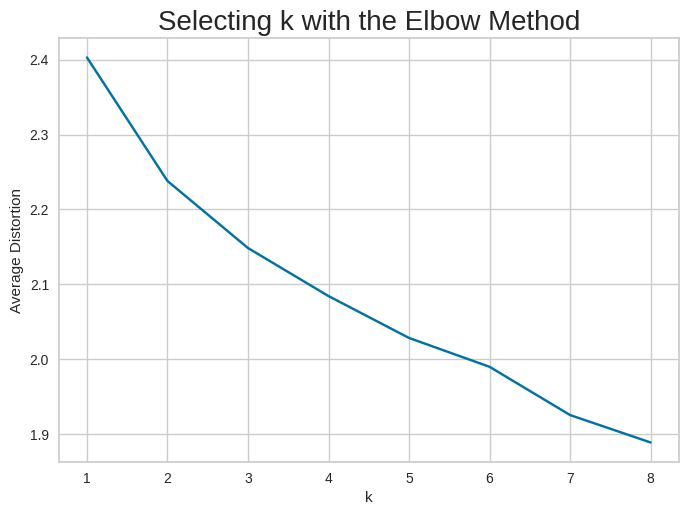

In [ ]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

Looks like beyond 4th cluster distortions flattened out. Elbow point is likely around cluster 3 or 4. I select 4.

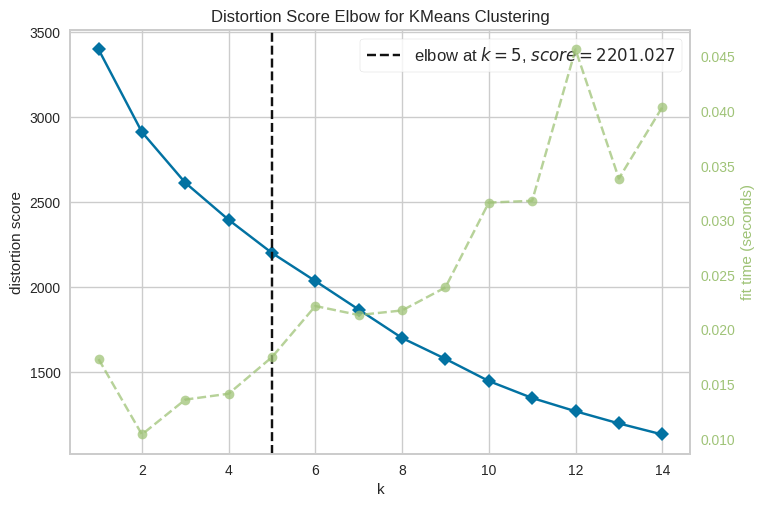

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

Elbow at K = 5 indicates adding additional clusters beyond 5 will not help much, so number of clusters = 5  can be considered. Score 2201 indicates distortion value associated with cluster.

**Let's check the silhouette scores**

For n_clusters = 2, silhouette score is 0.4632143452211626
For n_clusters = 3, silhouette score is 0.46125778464821965
For n_clusters = 4, silhouette score is 0.4476784584356052
For n_clusters = 5, silhouette score is 0.4076493146377449
For n_clusters = 6, silhouette score is 0.41415564864034843
For n_clusters = 7, silhouette score is 0.41778455058219616
For n_clusters = 8, silhouette score is 0.4252411904534848
For n_clusters = 9, silhouette score is 0.18355206702994034


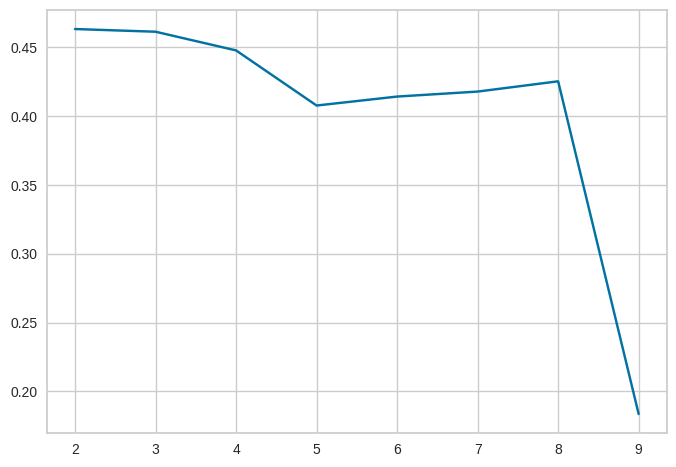

In [ ]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

For n_clusters = 2, the silhouette score is 0.4632. Data points are moderately well-clustered.
For n_clusters = 3, the silhouette score is 0.4606. clustering quality as with 2 clusters, but only slightly less distinct.
For n_clusters = 4, the silhouette score decreases to 0.4528S. Addition of more clusters might not be leading to clear separation between the clusters.

For n_clusters = 5, the silhouette score drops further to 0.3805, indicating that the quality of the clusters might be deteriorating as the number of
clusters increases.

For n_clusters = 6 to 9, the silhouette scores show fluctuations, and the values are relatively lower than those for 2 and 3 clusters.

3 CLusters will be good choice based on this score.

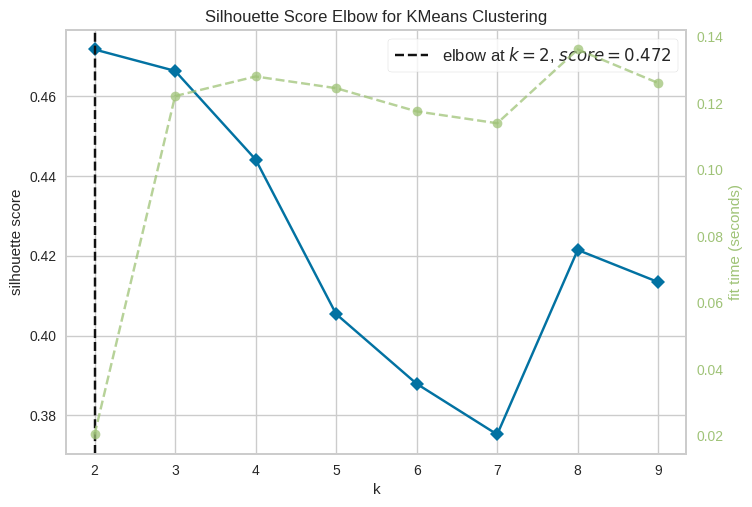

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

Consider the clusters from 2 to 8.

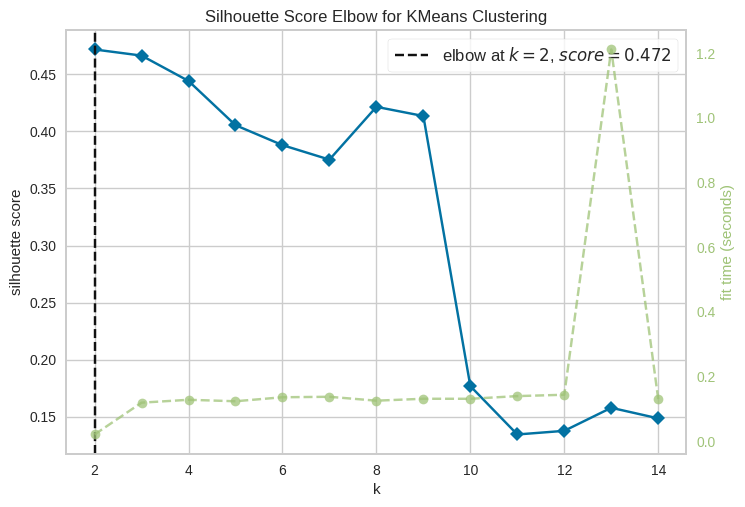

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

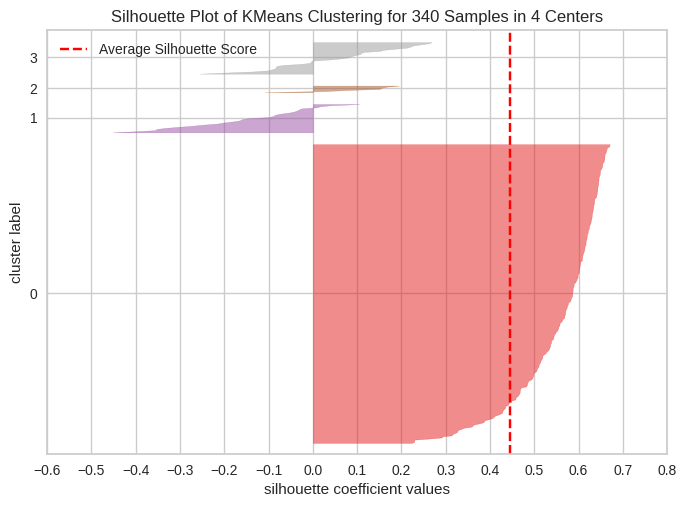

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

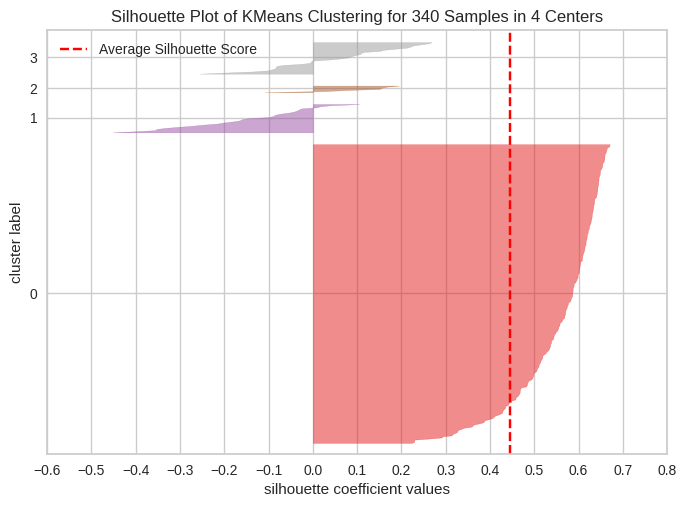

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

There is a better seperation of bars when we consider 3 clusters.

In [ ]:
# Find the index of the maximum silhouette score
optimal_num_clusters = cluster_list[sil_score.index(max(sil_score))]

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_num_clusters)

Optimal number of clusters: 2


now that the optimal number of clusters is 3 based on the highest silhouette score, lets proceed to perform K-means clustering with 3 clusters.

##Creating a Final Model.

In [ ]:
# final K-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [ ]:
km_cluster_profile = df1.groupby("KM_segments").mean()
print(km_cluster_profile)

             Current Price  Price Change  Volatility       ROE  Cash Ratio  \
KM_segments                                                                  
0                -0.093653      0.081985   -0.248723 -0.052455   -0.183028   
1                -0.436756     -1.622242    2.342968  0.699929   -0.221363   
2                 1.487344      0.779644    0.312439 -0.147823    2.250224   

             Net Cash Flow  Net Income  Earnings Per Share  \
KM_segments                                                  
0                -0.079551    0.118166            0.132111   
1                -0.110608   -1.367911           -1.862300   
2                 0.992978    0.116149            0.475628   

             Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
KM_segments                                                      
0                               -0.006538  -0.205091  -0.122750  
1                               -0.114408   1.309894   0.219435  
2                                0

In [ ]:
from sklearn.cluster import KMeans

# Creating the KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fitting the KMeans model to your scaled data
cluster_labels = kmeans.fit_predict(subset_scaled_df)

# Adding the cluster labels to your original DataFrame
df['Cluster'] = cluster_labels

**Cluster Profiling**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Load your data into a DataFrame (replace this with your actual data loading code)
# df = pd.read_csv("your_data.csv")

# Perform K-means clustering
n_clusters = 3  # Change this to the optimal number of clusters you determined
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df["K_means_segments"] = kmeans.fit_predict(subset_scaled_df)  # Replace subset_scaled_df with your scaled data

# Calculate cluster profiles
cluster_profile = df.groupby("K_means_segments").mean()

# Display the cluster profile DataFrame
print(cluster_profile)

                  Current Price  Price Change  Volatility       ROE  \
K_means_segments                                                      
0                      1.487344      0.779644    0.312439 -0.147823   
1                     -0.093653      0.081985   -0.248723 -0.052455   
2                     -0.436756     -1.622242    2.342968  0.699929   

                  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
K_means_segments                                                              
0                   2.250224       0.992978    0.116149            0.475628   
1                  -0.183028      -0.079551    0.118166            0.132111   
2                  -0.221363      -0.110608   -1.367911           -1.862300   

                  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  Cluster  
K_means_segments                                                               
0                                     0.190975   0.903609   1.127095      2.0  
1       

In [ ]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Cluster
K_means_segments,,,,,,,,,,,,
0,1.487344,0.779644,0.312439,-0.147823,2.250224,0.992978,0.116149,0.475628,0.190975,0.903609,1.127095,2.000000
1,-0.093653,0.081985,-0.248723,-0.052455,-0.183028,-0.079551,0.118166,0.132111,-0.006538,-0.205091,-0.122750,0.000000
2,-0.436756,-1.622242,2.342968,0.699929,-0.221363,-0.110608,-1.367911,-1.862300,-0.114408,1.309894,0.219435,1.000000


Let's check th ehighest value in each cluster.

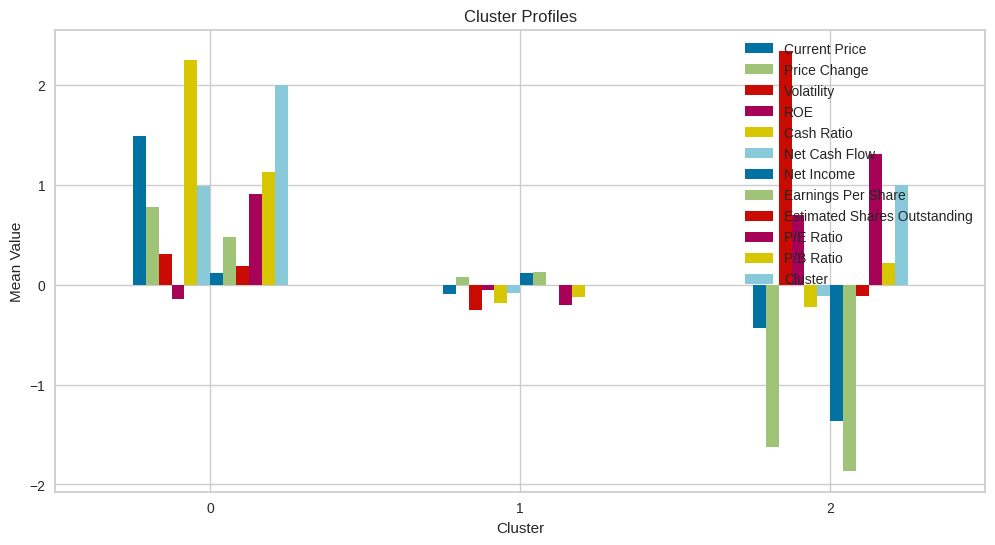

In [ ]:
# Create bar plots to visualize the mean values of features for each cluster
cluster_profile.plot(kind="bar", figsize=(12, 6))
plt.title("Cluster Profiles")
plt.ylabel("Mean Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Count the number of data points in each cluster
cluster_sizes = df["K_means_segments"].value_counts()

# Display the cluster sizes
print(cluster_sizes)

1    287
2     27
0     26
Name: K_means_segments, dtype: int64


Based on these numbers, cluster 1 has the most data points. Where as 0 and 2 have similar data points. Data points looks skewed.

In [ ]:
# Assign names to clusters based on characteristics
cluster_names = {
    0: "Cluster A",
    1: "Cluster B",
    2: "Cluster C"
}

# Map cluster names to the DataFrame
df["Cluster Names"] = df["K_means_segments"].map(cluster_names)

In [ ]:
df.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary          6
                  Consumer Staples                1
                  Energy                          1
                  Financials                      1
                  Health Care                     9
                  Information Technology          6
                  Real Estate                     1
                  Telecommunications Services     1
1                 Consumer Discretionary         34
                  Consumer Staples               18
                  Energy                          7
                  Financials                     48
                  Health Care                    31
                  Industrials                    52
                  Information Technology         24
                  Materials                      19
                  Real Estate                    26
                  Telecommunications Services     4
                  

Most Information technology stocks are in cluster 1.  Most energy stocks are in cluster 3. None of the consumer descriptionary stocks are in cluster 3.

['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio', 'Cluster', 'K_means_segments']
13


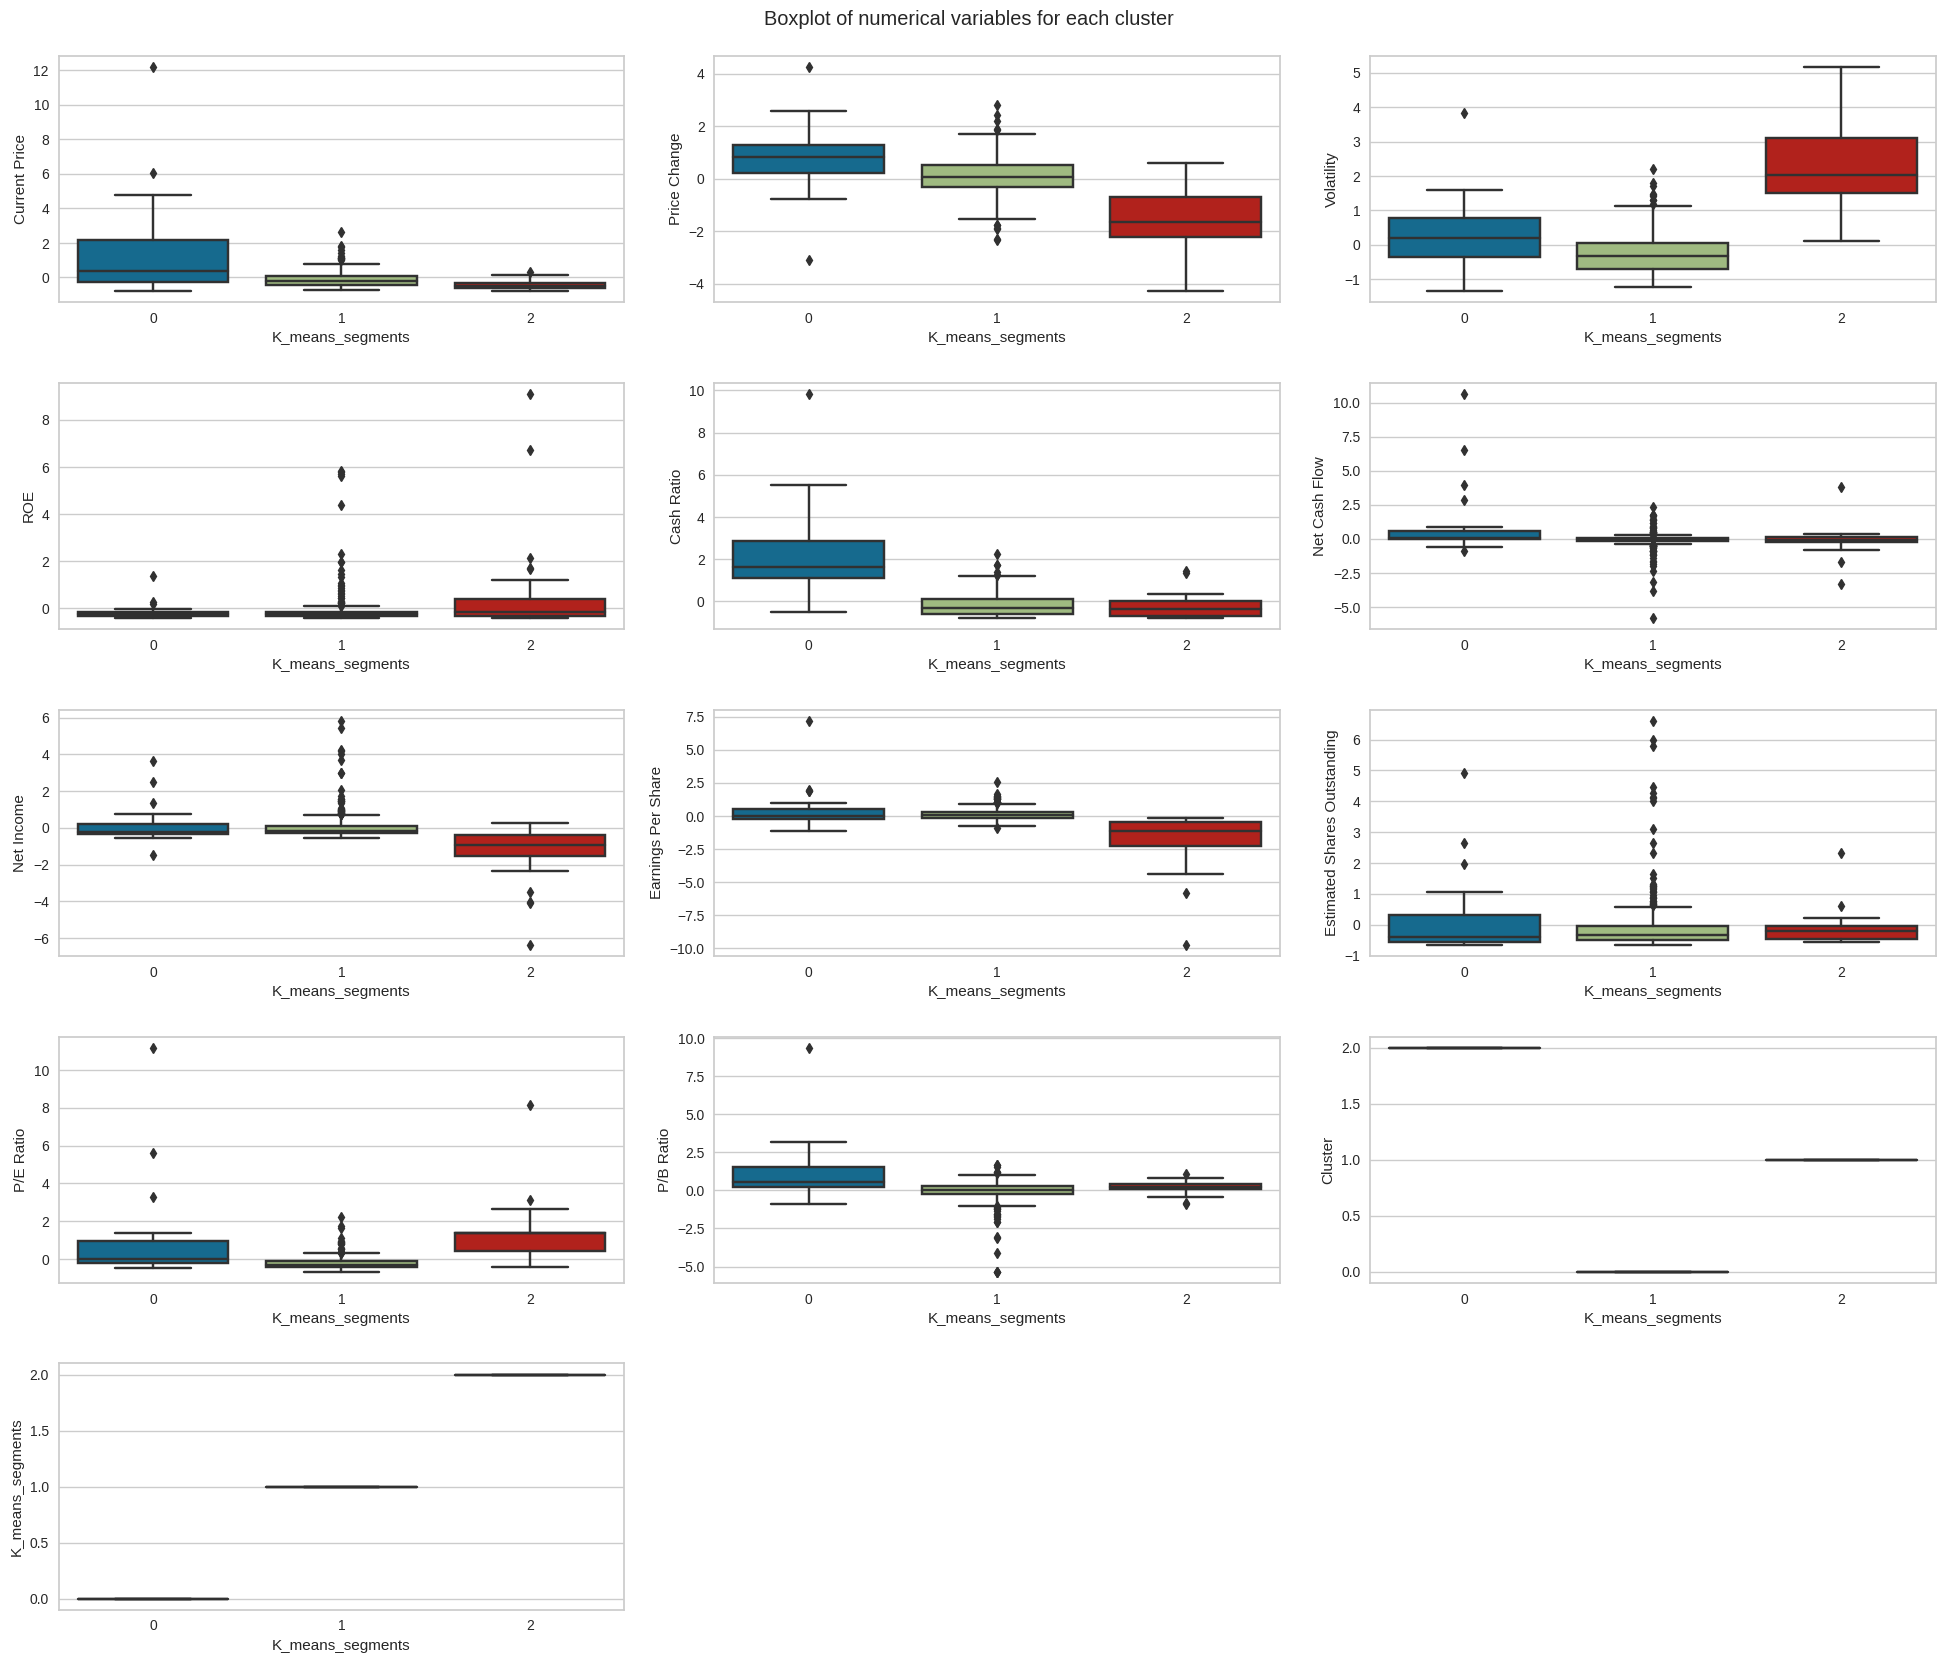

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
print(num_col)
num_subplots = len(num_col)
print(num_subplots)
num_rows = (num_subplots + 2)
for i, variable in enumerate(num_col):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_means_segments'>

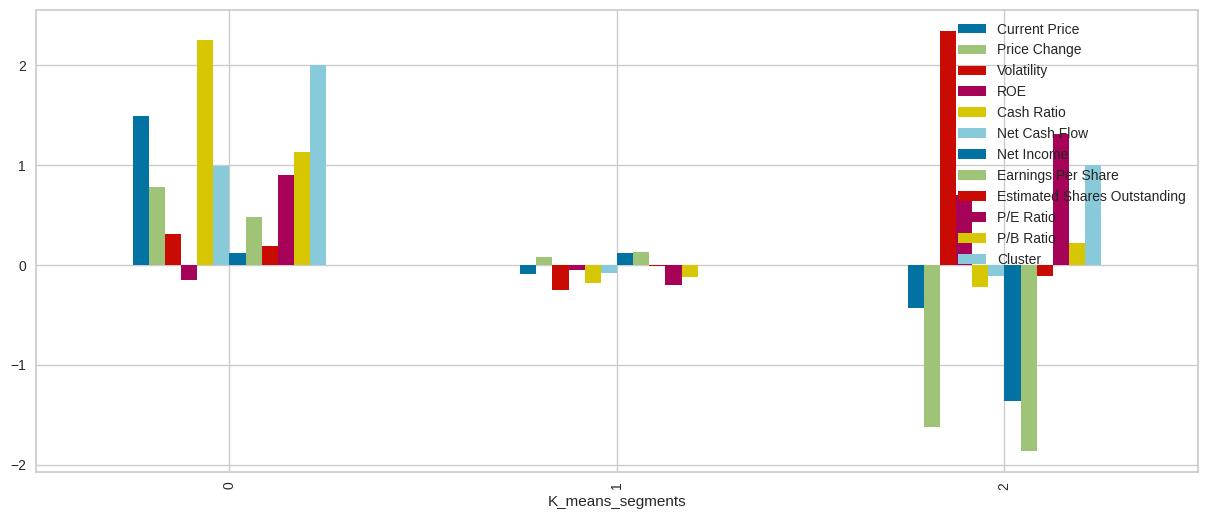

In [ ]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Cluster
K_means_segments,,,,,,,,,,,,
0,1.487344,0.779644,0.312439,-0.147823,2.250224,0.992978,0.116149,0.475628,0.190975,0.903609,1.127095,2.000000
1,-0.093653,0.081985,-0.248723,-0.052455,-0.183028,-0.079551,0.118166,0.132111,-0.006538,-0.205091,-0.122750,0.000000
2,-0.436756,-1.622242,2.342968,0.699929,-0.221363,-0.110608,-1.367911,-1.862300,-0.114408,1.309894,0.219435,1.000000


Cluster 0:


Higher "Current Price" compared to other clusters.

Positive "Price Change," indicating an increase in price on average.

High "Volatility" level.

Lower "ROE" (Return on Equity) compared to other clusters.

High "Cash Ratio," indicating a strong cash position.

Positive "Net Cash Flow," with a focus on generating cash.

Positive "Net Income."

Higher "Earnings Per Share" on average.

Moderate "Estimated Shares Outstanding."

Higher "P/E Ratio" (Price-to-Earnings Ratio) compared to other clusters.

Higher "P/B Ratio" (Price-to-Book Ratio) compared to other clusters.


Cluster 1:

Lower "Current Price" compared to other clusters.

Positive "Price Change" with a smaller magnitude.

Negative "Volatility," suggesting lower volatility in stock prices.

Slightly negative "ROE."

Lower "Cash Ratio."

Slightly positive "Net Cash Flow."

Slightly positive "Net Income."

Slightly negative "Earnings Per Share."

Slightly negative "Estimated Shares Outstanding."

Lower "P/E Ratio."

Lower "P/B Ratio."

Cluster 2:

Lower "Current Price" compared to other clusters.

Negative "Price Change," indicating a decrease in price on average.

High "Volatility," suggesting higher volatility in stock prices.

Positive "ROE," indicating a better return on equity.

Lower "Cash Ratio."

Negative "Net Cash Flow."

Negative "Net Income."

Slightly negative "Earnings Per Share."

Higher "Estimated Shares Outstanding."

Moderate "P/E Ratio."

Slightly higher "P/B Ratio."

Belongs to Cluster 2.

## Hierarchical Clustering

**Checking Cophenetic Correlation**

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# Sample data
data = np.random.rand(10, 2)

# Calculate linkage matrix
Z = linkage(data, method='ward')  # You can use other methods like 'single', 'complete', etc.

# Calculate cophenetic correlation
c, coph_dists = cophenet(Z, pdist(data))
print("Cophenetic correlation:", c)

Cophenetic correlation: 0.8129872846903358


In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            ))

Cophenetic correlation for Euclidean distance and single linkage is 0.9257979350911241.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8156131306369379.
Cophenetic correlation for Euclidean distance and average linkage is 0.9334747007945994.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8204714878577596.
Cophenetic correlation for Chebyshev distance and single linkage is 0.914305789364111.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7894179010273863.
Cophenetic correlation for Chebyshev distance and average linkage is 0.927094002818066.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9024479410258152.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9287164932150344.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.634528010188488.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9144594855325687.
Cophenetic corre

Highest cophenetic correlation is  0.9334747007945994., which is obtained with average linkage.

We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

In [ ]:
hc_df = subset_scaled_df.copy()



**Checking Dendrograms**


Let's see the dendrograms for the different linkage methods.

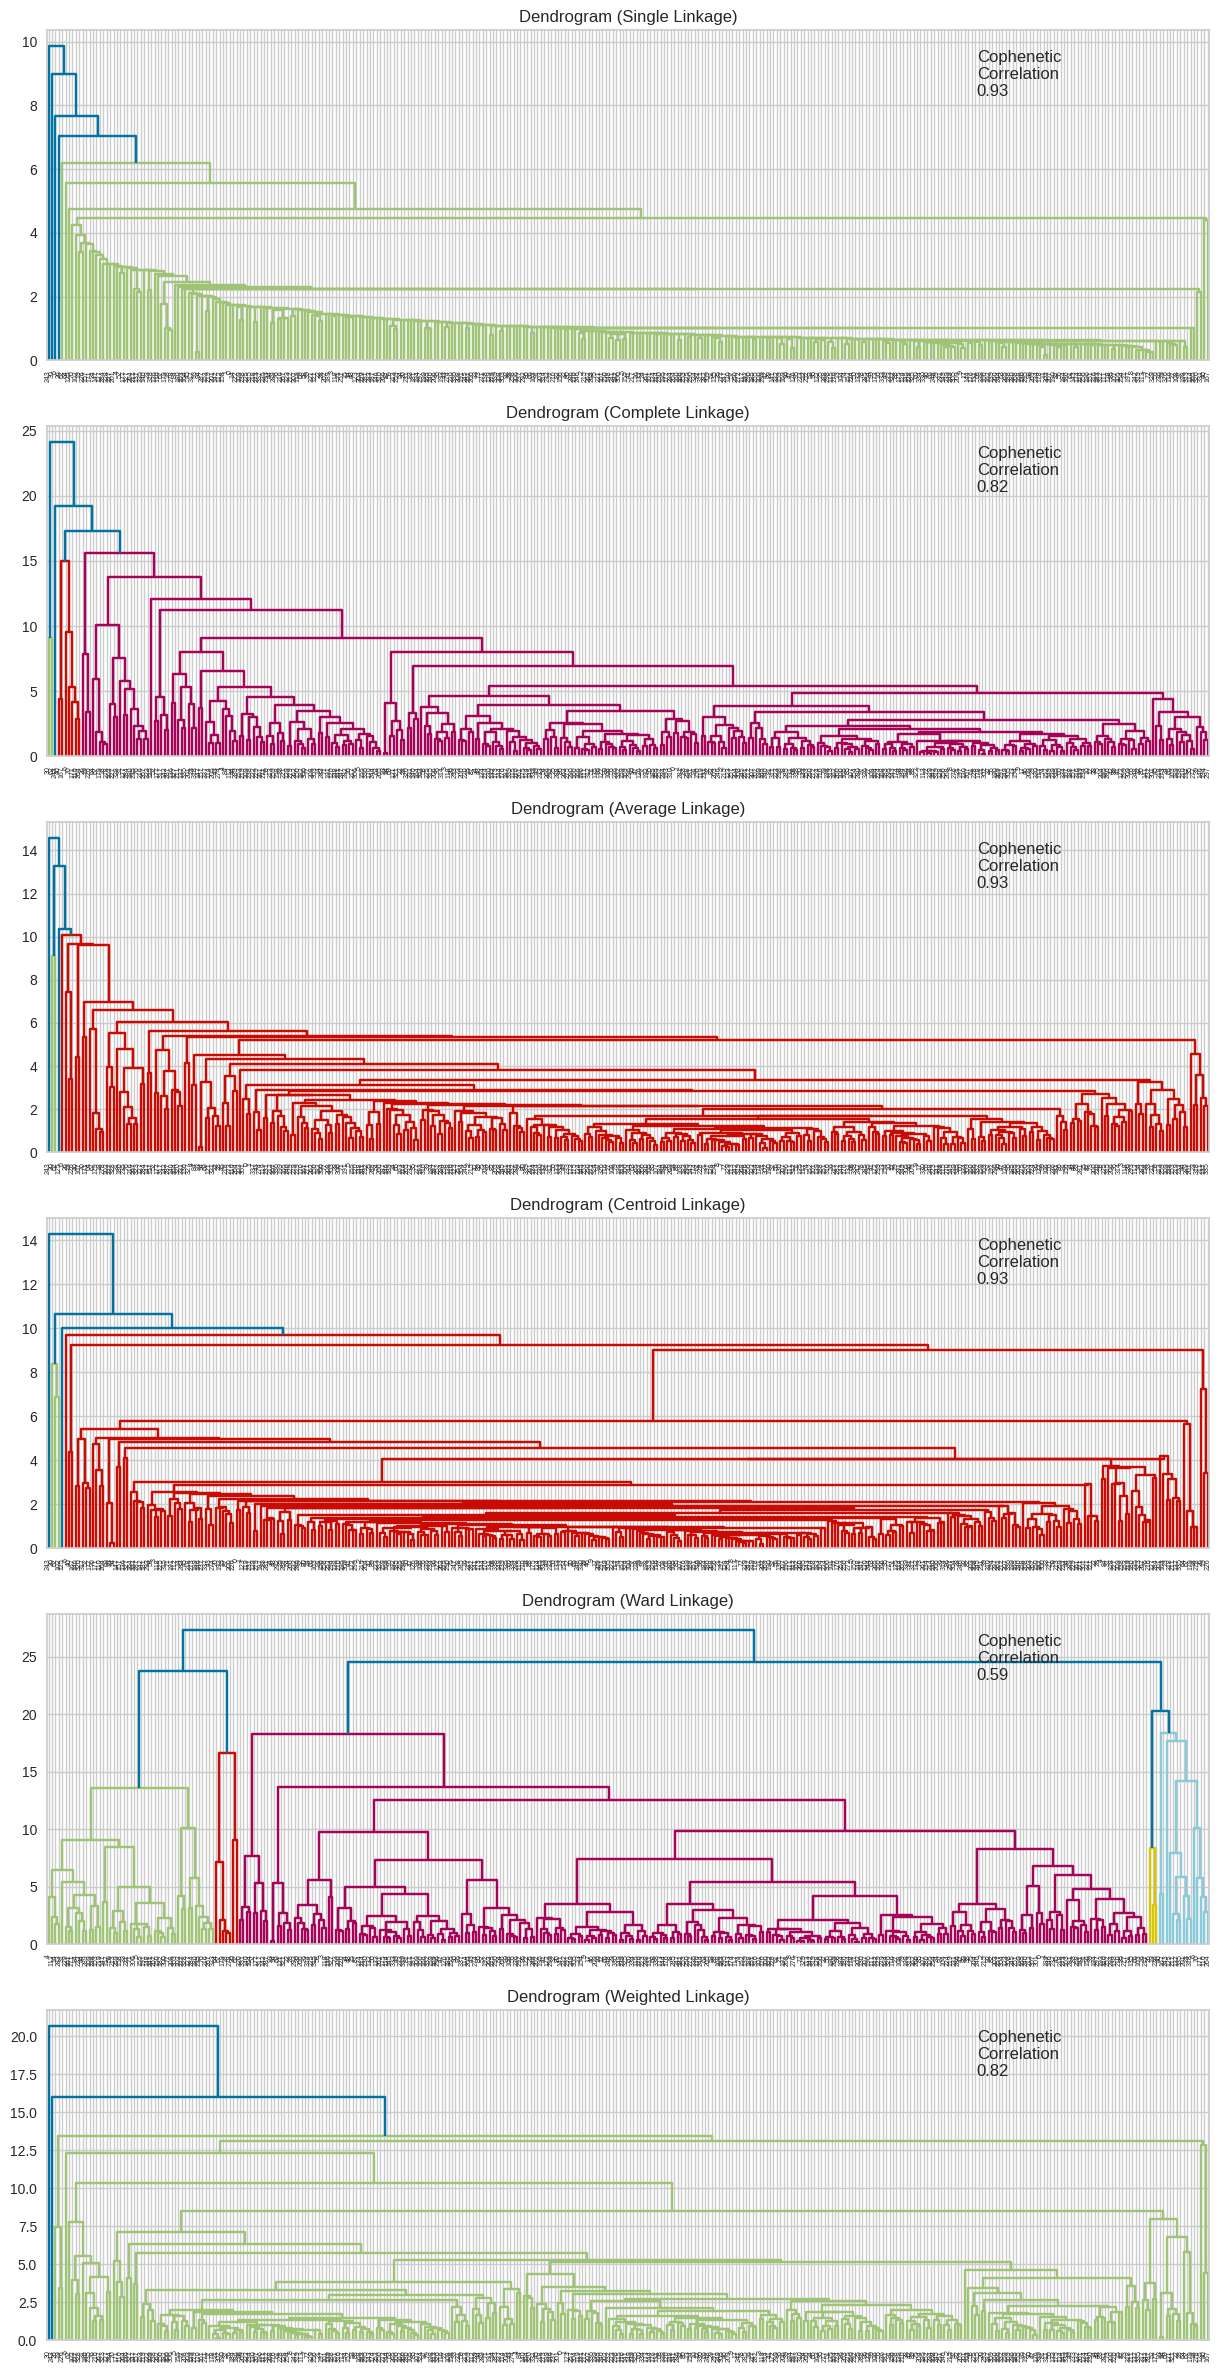

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

"Single Linkage" has a cophenetic correlation of 0.93.

"Complete Linkage" has a cophenetic correlation of 0.82.

"Average Linkage" has a cophenetic correlation of 0.93.

"Centroid Linkage" has a cophenetic correlation of 0.93.

"Ward Linkage" has a cophenetic correlation of 0.59.

"Weighted Linkage" has a cophenetic correlation of 0.82.

Higher cophenetic correlation values generally indicate that the corresponding linkage method is better at preserving the pairwise distances in the dendrogram. In this case, "Single Linkage," "Average Linkage," and "Centroid Linkage" all have high cophenetic correlation values, suggesting that these methods are effective at maintaining the original data distances.

Let's use Average linkage since it has higher cophenetic correlation value.

### Creating model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

In [ ]:
hc_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

In [ ]:


hierarchical_clusters = HCmodel.labels_
kmeans_clusters = kmeans.labels_

# Create a DataFrame to compare cluster assignments
comparison_df = pd.DataFrame({
    'Hierarchical_Cluster': hierarchical_clusters,
    'KMeans_Cluster': kmeans_clusters
})

# Find similar clusters (same assignments in both algorithms)
similar_clusters = comparison_df[comparison_df['Hierarchical_Cluster'] == comparison_df['KMeans_Cluster']]

# Count observations in similar clusters
observations_in_similar_clusters = similar_clusters['Hierarchical_Cluster'].value_counts()

# Print the count of observations in similar clusters
print(observations_in_similar_clusters)

0    21
2     2
Name: Hierarchical_Cluster, dtype: int64


There are two clusters (clusters 0 and 2) that have similar assignments between the Hierarchical Clustering and K-Means Clustering algorithms.

For cluster 0, there are 21 observations that have the same cluster assignment in both algorithms.
For cluster 2, there are 2 observations that have the same cluster assignment in both algorithms.

## Cluster Profiling

In [ ]:
cluster_profile = df2.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["GICS Sector"].count().values
)

In [ ]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Cluster,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,,
0,-0.062734,-0.008046,-0.023205,-0.042686,-0.034255,0.002980,0.032528,0.019819,-0.001576,-0.081618,-0.029115,0.198795,1.009036,332
1,12.195670,-0.074042,-0.435986,-0.109922,1.262362,-0.888563,0.268653,7.192572,-0.622886,-0.161672,0.047742,2.000000,0.000000,1
2,-0.575803,-1.453888,3.311126,7.908297,-0.210698,-0.693613,-5.236157,-6.778822,-0.068025,0.635362,0.235430,1.000000,2.000000,2
3,0.243055,1.013134,-0.347539,-0.327752,9.834905,0.276029,0.552725,-0.222962,2.632871,1.067680,0.545140,2.000000,0.000000,1
4,1.998837,0.176091,-0.692132,-0.099549,-0.498664,0.018187,-0.228206,0.932390,-0.603923,-0.035502,9.377562,2.000000,0.000000,1
5,2.513965,1.488004,0.852517,-0.369243,0.398462,0.330693,-0.306744,-0.308093,-0.248951,8.318604,-0.258428,1.666667,0.666667,3


In [ ]:
for cl in df2["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Citigroup Inc.'
 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Gr

Cluster 0:
This cluster seems to contain a diverse range of companies from various industries, including airlines, healthcare, technology, financial services, consumer goods, and more.

It appears to be a mixed group without a clear thematic pattern.

Cluster 1:
This cluster contains companies primarily associated with technology, social media, pharmaceuticals, and other high-growth sectors.

Companies like Amazon, Facebook, Intel, and McDonald's are part of this cluster.

Cluster 2:
This cluster consists of companies primarily from the energy sector, including oil and gas exploration and production companies like Apache Corporation, Anadarko Petroleum Corp, and Chesapeake Energy.


In [ ]:
df2.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary         38
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    39
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
3            Information Technology          1
4            Information Technology          1
5            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
Name: Security, dtype: int64

Companies from  many sectors are in the first cluster whereas diversity of sctors reduces significantly in other sectors.

['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio', 'Cluster', 'K_means_segments']
13


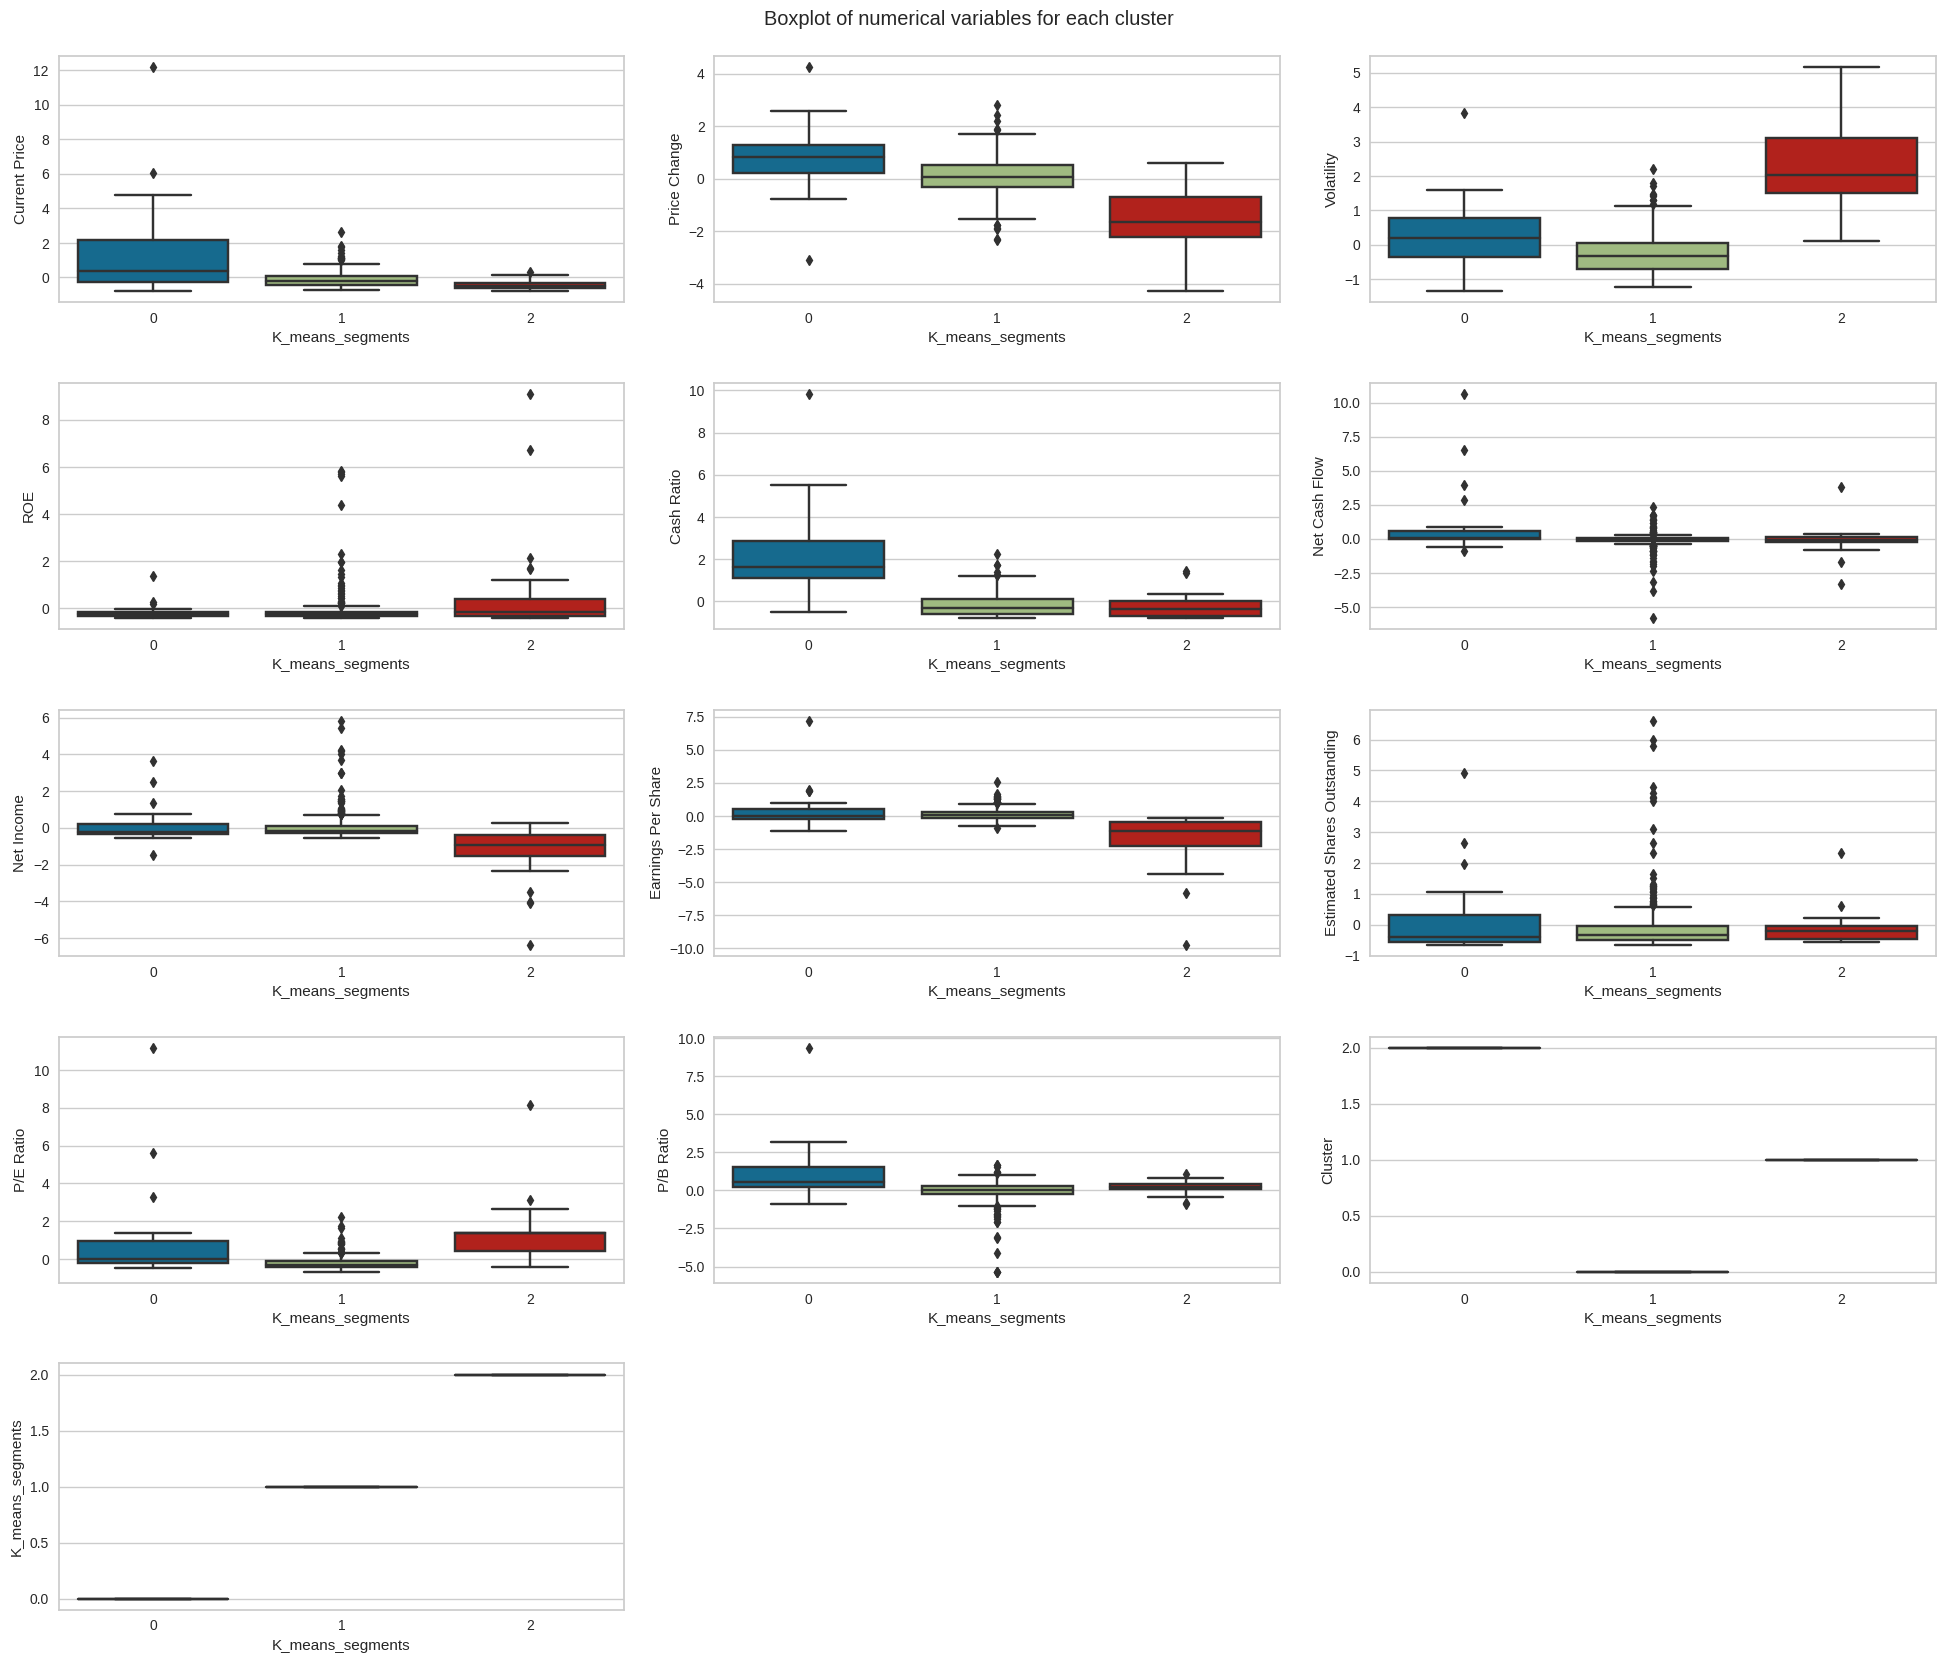

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
print(num_col)
num_subplots = len(num_col)
print(num_subplots)
num_rows = (num_subplots + 2)
for i, variable in enumerate(num_col):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

Current price distribution is across 1st cluster (between 1.75 to 2), infact most distibutions across all the attributes is in defined range of box plot  for FIRST cluster ( Cluster 0 ). Second cluster (Cluster 1 ) is mostly skewed across all the attributes except price change.

['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio', 'Cluster', 'K_means_segments']
13


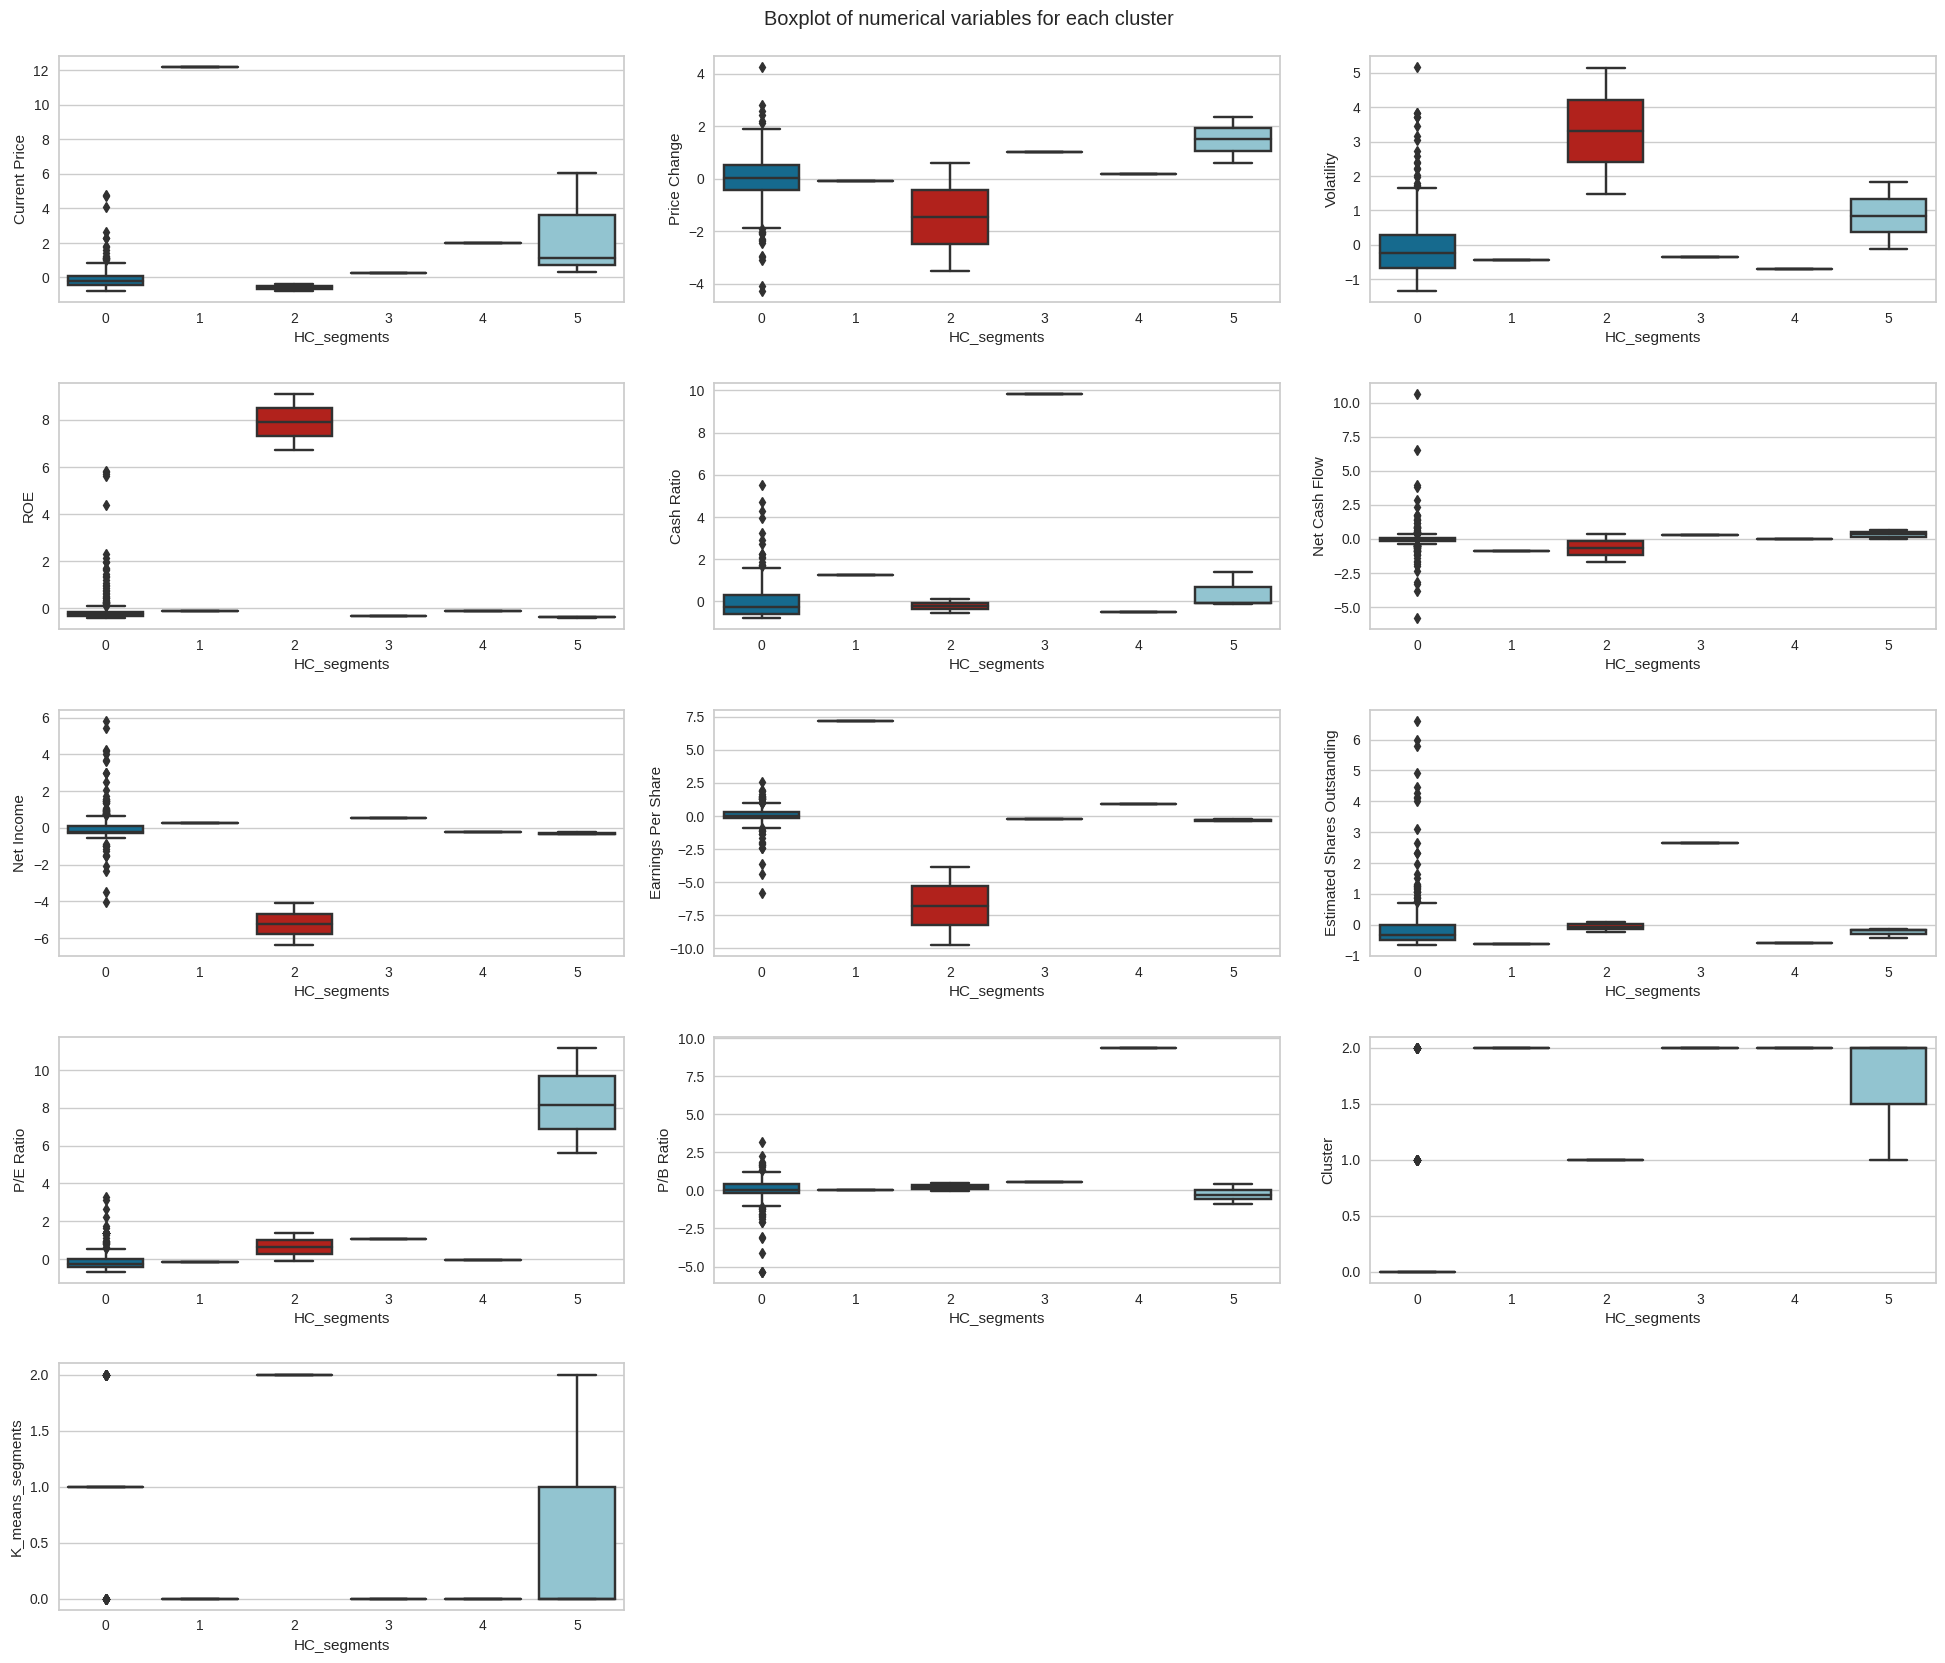

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
print(num_col)
num_subplots = len(num_col)
print(num_subplots)
num_rows = (num_subplots + 2)
for i, variable in enumerate(num_col):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)



Plotted for 6 clusters but many distributions are flattened for second  cluster between to 5th cluster.

In [ ]:

hierarchical_clusters = HCmodel.labels_
kmeans_clusters = kmeans.labels_

# Create a DataFrame to compare cluster assignments
comparison_df = pd.DataFrame({
    'Hierarchical_Cluster': hierarchical_clusters,
    'KMeans_Cluster': kmeans_clusters
})

# Find similar clusters (same assignments in both algorithms)
similar_clusters = comparison_df[comparison_df['Hierarchical_Cluster'] == comparison_df['KMeans_Cluster']]

# Count observations in similar clusters
observations_in_similar_clusters = similar_clusters['Hierarchical_Cluster'].value_counts()

# Print the count of observations in similar clusters
print(observations_in_similar_clusters)

0    21
2     2
Name: Hierarchical_Cluster, dtype: int64


There are two clusters (clusters 0 and 2) that have similar assignments between the Hierarchical Clustering and K-Means Clustering algorithms.

For cluster 0, there are 21 observations that have the same cluster assignment in both algorithms.
For cluster 2, there are 2 observations that have the same cluster assignment in both algorithms.

## K-means vs Hierarchical Clustering

All the clustering models execuated pretty quickly.

Heirachical model took little more time than K-means.

Heirachical model gave 6 clusters though 3 clusters have vertical distances relatively large than other 3.

K-means model's elbow method shows betwen 3 to 4 clusters where as from Silhouette score 3 clusters looks optimal.

3 clusters are optimal number of clusters from both the algorithms.

There are two clusters (clusters 0 and 2) that have similar assignments between the Hierarchical Clustering and K-Means Clustering algorithms.

For cluster 0, there are 21 observations that have the same cluster assignment in both algorithms.
For cluster 2, there are 2 observations that have the same cluster assignment in both algorithms.



## Actionable Insights and Recommendations

**Portfolio diversification:**
Stocks can be categorized into three different categories.

We can recommend clients the importance of maintaining a diversified portfolio that includes stocks from each of these clusters.

Across these 3 portfolios there will be a mix of risk and return.

**Investment allocation:**

Suggesst risk and return for each cluster. Based on clien'ts financial goals, portofolio can be created. For high risk client more stocks from  cluster 2  where volatality is high but ROE high as well.

For low risk customers, cluster 0 and 1 are best choices where volatality is low and so ROE.

**Stock selection:**

 Low risk client, select stocks from low volatility stocks.
 High risk client, sleect stocks from cluster 2 and few stocks from 1.

 **Sector Selection:**
Include stocks from various sectors using clusters. Cluster 0 has wide diversified cluster. You will find most of the sectors here.

Information technology stocks are in all the sectors. But Sector 2 has high risk high reward IT companies.

Recommendations:
 **Monitor stocks **
Continuously monitoring the performance of stocks within each cluster and tracking market trends can help us timely provide recommendations for adjustments to clients' portfolios.

In summary, the identification of three optimal clusters through Hierarchical and K-Means clustering provides a framework for to the company to offer personalized investment strategies. By understanding the risk-return profiles of these clusters, clients can make well-informed investment decisions aligned with their financial objectives and risk preferences.

